### Please explain the choice of metric / evaluation criterion used

A good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms. An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0 . We will test multiple classification algorithms on undersampled data and choose the algorithm with high F beta score. F beta(F1) score is a generalized form of F1 score. F1 score has precision and recall equal weightage. In F1 score, you can give weightage to precision and recall using parameter beta. We will give Recall higher preference.

### What are the assumptions you made when building this model?

xgboost is the classification model which gave the highest F beta score. xgboost assumes an ordinal relationship between the categorical variable after one hot encoding. This is not true for all the categorical variables. It also assumes a dataset with minimal outliers as each outliers influences the xgboost in a very big manner. Sparse elements are treated as missing data by the xgboost algorithm. Columns with high nan values were removed to generate a better input data. String values of categorical values were converted to numerical values. Numerical values were standardised inorder to get a fair model as bigger values influecing the output needed to be avoided. Another assumption is that the dataset is highly skewed as one class dominated the training dataset and hence it had to be scaled down to get a good training data set using undersampling technique.

### What were the approaches you considered? 

First the data needed to be preprocessed. Data was clened using various techniques. duplicate values were dropped and nullvalues were identified and columns with high null values were identified in both test and train data.The common columns with  null values and train data null value columns were removed. The categorical variables were converted to numerical variables. Numerical variables were standardised. The training dataset was then viewed interms of the classes and found to be overly skewed. Over sampling and undersampling werer done to create two different data sets. These were fed into a pipeline of different classifiers namely xgboost,decisiontree,gradientboosting,randomforest and bagging with the use of kfold model selection and the f beta score was evaluated to find out the best model which turned out to be xgboost with over 89.64% F beta score. Which was then compared to understand the superior prediction of undersampled dataset rather than the oversampled data.

xgboost is one of the best machine learning algorithms in use and it has inbuilt techniques to reduce overfitting. It takes care of missing values and outliers. It also has a inbuilt cross validation as well.

The training time for xgboost is very long and the over sampled data set took a lot of time to get the output. xgboost also is more likely to overfit compared to a random forest model. xgboost also assumes a ordinal relationship between the converted categorical variables which may not always be true. Unlike neural network or linear models most of the tree models doesnt give satisfactory results when extrapolating a result as well.

### Please explain under what conditions will the model you choose be not appropriate

The training time for xgboost is very long and the over sampled data set took a lot of time to get the output.Hence for bigger data sets it might take a lot of processing time.  xgboost also is more likely to overfit compared to a random forest model. xgboost also assumes a ordinal relationship between the converted categorical variables which may not always be true. Unlike neural network or linear models most of the tree models doesnt give satisfactory results when extrapolating a result as well.

### How confident are you of the model’s robustness and how would you explain themodel’s performance?

The model has a high F beta score  and it shows high robustness of the model on different samples. The model works well and is better model compared to other machine learning algorithms as the comparison of errors shows.Right feature engineering is indeed key to achieving better performance of a model.

### Why is your model performing well / not well?

xgboost is one of the best classifiers in use now adays. It has inbuilt feature importance ranking ,Parallelised processes with cache memmory use , it handles missing data very well as well. It has built in cross valdation techniques as well as boosting and multi threadings. It gave a high F1 score of 89.64% and is robust with train and test datasets. he feature engineering also played a huge role in achieving a better fit.

### Was any feature engineering required? If yes, what were they. If no, why?

Feature engineering played a huge part in effective model building. The train and test datasets which had laregely null values were removed. The columns which were not present in test and train data simultaneously were also removed. The numerical variables were standardised inorder to reduce the larger values influecing the model in greater proportion. Categorical variables were converted to numerical varialbes using encoding. Strings which were of no use were removed as well. 
The training dataset was resampled using undersampling and oversampling techniques due to it's unbalanced nature of classification. 

In [7]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [8]:
# READ DATA
train_data = pd.read_csv('spendData.csv')
train_data = train_data[train_data.columns[1:]]
train_data.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,2.0,NaN,1,5,1,57,34,1,NaN,...,1,0,0,0,1,0,0,0,5.0,NaN
1,1,2.0,NaN,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,1,0,NaN,NaN
2,1,2.0,NaN,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,3.0,NaN
3,1,2.0,NaN,1,6,1,57,34,2,4.0,...,0,0,0,0,1,0,1,0,5.0,NaN
4,1,2.0,NaN,1,8,1,22,1,1,NaN,...,0,0,0,0,0,0,0,0,5.0,NaN


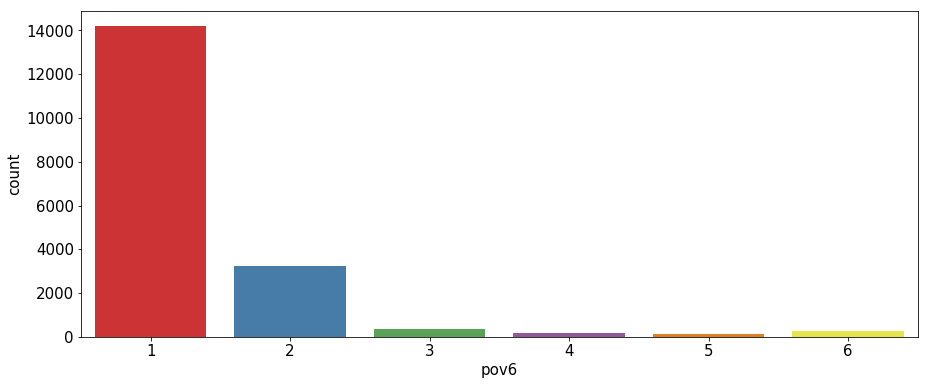

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(train_data.pov6, palette='Set1')
plt.show()

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 300 entries, month to t.158
dtypes: float64(134), int64(164), object(2)
memory usage: 42.1+ MB


DATA has 18379 DATA POINTS and 300 FEATURES and the TARGET FEATURE is **'pov6'**

In [75]:
train_data.pov6

0        1
1        1
2        1
3        1
4        2
5        1
6        1
7        1
8        1
9        1
10       1
11       4
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       2
25       1
26       1
27       1
28       1
29       1
        ..
18349    1
18350    1
18351    1
18352    1
18353    1
18354    1
18355    1
18356    2
18357    1
18358    1
18359    1
18360    1
18361    1
18362    1
18363    1
18364    1
18365    1
18366    1
18367    1
18368    1
18369    2
18370    1
18371    1
18372    1
18373    2
18374    1
18375    1
18376    5
18377    1
18378    2
Name: pov6, Length: 18379, dtype: int64

## TEST DATA

In [12]:
# READ TEST DATA
test_data = pd.read_csv('testdata.csv')
test_data = test_data[test_data.columns[1:]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 299 entries, month to f.284
dtypes: float64(127), int64(170), object(2)
memory usage: 10.5+ MB


## DROP DUPLICATES

In [13]:
train_data.drop_duplicates()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,2.0,NaN,1,5,1,57,34,1,NaN,...,1,0,0,0,1,0,0,0,5.0,NaN
1,1,2.0,NaN,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,1,0,NaN,NaN
2,1,2.0,NaN,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,3.0,NaN
3,1,2.0,NaN,1,6,1,57,34,2,4.0,...,0,0,0,0,1,0,1,0,5.0,NaN
4,1,2.0,NaN,1,8,1,22,1,1,NaN,...,0,0,0,0,0,0,0,0,5.0,NaN
5,1,1.0,NaN,1,7,1,25,29,2,1.0,...,0,0,0,0,0,0,1,0,3.0,NaN
6,1,1.0,NaN,1,11,1,3,2,1,NaN,...,0,0,0,0,0,0,0,0,3.0,NaN
7,1,1.0,NaN,1,6,1,47,8,1,NaN,...,0,0,0,0,0,0,0,0,2.0,NaN
8,1,1.0,NaN,1,6,1,83,3,2,4.0,...,0,0,0,0,0,0,0,0,NaN,NaN
9,1,1.0,NaN,1,5,1,16,17,2,1.0,...,0,0,0,0,0,0,1,0,3.0,NaN


#### NO DUPLICATES FOUND 

# REMOVE NULL VALUES


We will make a dictionary with column as KEY and total number of null values in that column as VALUE. Then we will sort that dictionary in descending order by VALUE and remove those columns that have more than 11000 null values.

In [14]:
train_null_columns = []

# ITERATE THROUGH TRAINING DATA COLUMNS AND CHECK WHETHER IT HAS NULL VALUES OR NOT
for index, rows in pd.DataFrame(train_data.isna().any()).iterrows():
    if rows[0] == True:
        # COLUMNS WITH NULL VALUES MORE THAN 11000
        if train_data[index].isna().sum() >= 11000:
            train_null_columns.append(index)
        
train_null_columns

['var6',
 'b.10',
 'b.11',
 'b.13',
 'b.14',
 'b.20',
 'b.21',
 'c.31',
 'c.36',
 'c.37',
 'c.61',
 'c.67',
 'f.105',
 'f.106',
 'f.107',
 'f.108',
 'f.109',
 'f.110',
 'f.111',
 'f.112',
 'f.113',
 'f.114',
 'f.115',
 'f.116',
 'f.117',
 'f.118',
 'f.119',
 'f.120',
 'f.121',
 'f.122',
 'f.123',
 'a.184',
 'a.185',
 'b.195',
 'c.215',
 'c.216',
 'c.217',
 'c.218',
 'c.219',
 'c.220',
 'c.221',
 'c.222',
 'c.223',
 't.158']

## SIMILARLY CHECK FOR THE NULL VALUES IN TEST DATA

As test data has 4595 datapoints we will check for the columns that has null values more than 4000

In [15]:
# STORE ALL THE COLUMNS THAT HAS NULL VALUES 
test_null_columns = []

# ITERATE THROUGH TEST DATA COLUMNS AND CHECK WHETHER IT HAS NULL VALUES OR NOT
for index, rows in pd.DataFrame(test_data.isna().any()).iterrows():
    if rows[0] == True:
        # COLUMNS WITH NULL VALUES MORE THAN 11000
        if test_data[index].isna().sum() >= 4000:
            test_null_columns.append(index)
        
test_null_columns    

['var6',
 'b.10',
 'b.11',
 'pov6',
 'c.36',
 'c.37',
 'c.61',
 'c.67',
 'f.105',
 'f.106',
 'f.107',
 'f.108',
 'f.109',
 'f.110',
 'f.111',
 'f.114',
 'f.115',
 'f.116',
 'f.117',
 'f.118',
 'f.119',
 'f.120',
 'f.121',
 'f.122',
 'f.123',
 'a.184',
 'a.185',
 'totshopping.rep',
 'c.215',
 'c.216',
 'c.217',
 'c.218',
 'c.219',
 'c.220',
 'c.221',
 'c.223']

## COMMON NULL COLUMNS TO BE DELETED

In [36]:
# COLUMNS THAT HAVE MOSTLY NULL VALUES IN TRAIN DATA BUT NOT IN TEST DATA
set(train_null_columns) - set(test_null_columns)

{'b.13',
 'b.14',
 'b.195',
 'b.20',
 'b.21',
 'c.222',
 'c.31',
 'f.112',
 'f.113',
 't.158'}

In [37]:
# COLUMNS THAT HAVE MOSTLY NULL VALUES TEST DATA BUT NOT IN TRAIN DATA
set(test_null_columns) - set(train_null_columns)

{'pov6', 'totshopping.rep'}

As we can see columns **'pov6' and 'totshopping.rep'** are having most of the null values in test data. 'pov6' is our label or target columns so we can delete this column from the test data and after storing the values of column 'pov6' in another variable named "label", we can delete it from the training data as well.

Lets analyse **'totshopping.rep'** whether we should delete it or not. 

In [38]:
test_data['totshopping.rep'].isna().sum()

4595

In [39]:
train_data['totshopping.rep'].isna().sum()

0

So here we can see that column **'totshopping.rep'** has all the values null in test data but no values null in the training data. Then the question is "WE SHOULD DELETE IT OR NOT"?

ANSWER IS "YES", because test data is what on we need to test our model and if the features are not present in the test data, it is totally irrelevant to include it in the training data.

****
So the TOTAL NULL COLUMNS TO BE DELETED are 

    train_null_columns + set(test_null_columns) - set(train_null_columns)
    
    i.e. train_null_columns + {'pov6', 'totshopping.rep'}
****

In [40]:
# TOTAL NULL COLUMNS TO BE DELETED
tot_cols = train_null_columns + list(set(test_null_columns) - set(train_null_columns))

print('TOTAL COLUMNS TO BE DELETED', len(tot_cols))

# DELETE THE NULL VALUED COLUMNS FROM TRAINING DATA 
filtered_data = train_data.drop(tot_cols, axis=1)

print('COLUMNS BEFORE', len(train_data.columns))
print('COLUMNS AFTER REMOVAL', len(filtered_data.columns))

TOTAL COLUMNS TO BE DELETED 46
COLUMNS BEFORE 300
COLUMNS AFTER REMOVAL 254


It has removed 46 columns with most of the null values. It has reduced features from 300 to 254.

In [41]:
# DELETE THE NULL VALUED COLUMNS FROM TEST DATA 
filtered_test_data = test_data.copy()

for col in tot_cols:
    try:
        filtered_test_data.drop([col], axis=1, inplace=True)
    except:
        print('{} COLUMN not in TEST DATA '.format(col))

print()
print('COLUMNS BEFORE', len(test_data.columns))
print('COLUMNS AFTER REMOVAL', len(filtered_test_data.columns))

t.158 COLUMN not in TEST DATA 

COLUMNS BEFORE 299
COLUMNS AFTER REMOVAL 254


Similarly it has reduced test data features from 299 to 254

## CHECK WHETHER TEST DATA AND TRAINING DATA BOTH HAVE SAME COLUMNS OR NOT

In [22]:
if set(filtered_data.columns.tolist()) == set(filtered_test_data.columns.tolist()):
    print('THEY BOTH HAVE SAME COLUMNS')
else:
    print(set(filtered_data.columns.tolist()) - set(filtered_test_data.columns.tolist()))
    print(set(filtered_test_data.columns.tolist()) - set(filtered_data.columns.tolist()))

THEY BOTH HAVE SAME COLUMNS


## MAKE LABEL

'pov6' column as LABEL data 

'filtered_data' is our FEATURE data.

In [42]:
# MAKE LABEL
label = pd.DataFrame(train_data.pov6)

## STRING FEATURE VALUES

List all the features columns that has string values.

In [43]:
# SELECT COLUMNS WITH OBJECT DATATYPE
filtered_data.columns[filtered_data.dtypes=='object']

Index(['var9', 'respondent.id'], dtype='object')

In [44]:
filtered_data['var9'].head()

0     Mono
1     Mono
2    Multi
3     Mono
4    Multi
Name: var9, dtype: object

In [45]:
filtered_data['respondent.id'].head()

0    2016_1
1    2016_2
2    2016_3
3    2016_4
4    2016_5
Name: respondent.id, dtype: object

As we can see column **respondent.id** is not of any use, so we can delete it. We need to encode column **var9** to numerical values, we can do one hot encoding using **pandas.get_dummies**

In [46]:
# ENCODE STRING COLUMNS 
pd.get_dummies(filtered_data.var9)

,Mono,Multi
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


## CONCATENATE THE ENCODED DATA WITH TRAINING DATA 

After concatenation , remove both the string columns

In [47]:
# CONCAT THE DUMMY DATA WITH THE TRAINING DATA
filtered_data = pd.concat([filtered_data, pd.get_dummies(filtered_data.var9)], axis=1 )

# REMOVE UNWANTED STRING COLUMN
filtered_data.drop(['respondent.id','var9'], axis=1, inplace=True)
len(filtered_data.columns)

254

## SAME FOR TEST DATA

In [48]:
# CONCAT THE DUMMY DATA WITH THE TEST DATA
filtered_test_data = pd.concat([filtered_test_data, pd.get_dummies(filtered_test_data.var9)], axis=1 )

# REMOVE UNWANTED STRING COLUMN
filtered_test_data.drop(['respondent.id','var9'], axis=1, inplace=True)
len(filtered_test_data.columns)

254

## FILL NULL VALUES WITH MEAN

Fill the null values of each column with mean value of that particular column.

In [49]:
# BEFORE REMOVING NULL VALUES
filtered_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,2.0,1,5,1,57,34,1,NaN,1,...,0,0,0,1,0,0,0,5.0,1,0
1,1,2.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,NaN,1,0
2,1,2.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,0,1
3,1,2.0,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,1,0
4,1,2.0,1,8,1,22,1,1,NaN,1,...,0,0,0,0,0,0,0,5.0,0,1


In [50]:
# FILL ALL THE NULL VALUES WITH MEAN
filtered_data.fillna(filtered_data.mean(), inplace=True)
filtered_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,2.0,1,5,1,57,34,1,2.224272,1,...,0,0,0,1,0,0,0,5.000000,1,0
1,1,2.0,1,4,1,57,34,2,3.000000,1,...,0,0,0,0,0,1,0,3.038536,1,0
2,1,2.0,1,5,1,57,42,2,1.000000,1,...,0,0,0,0,0,0,0,3.000000,0,1
3,1,2.0,1,6,1,57,34,2,4.000000,1,...,0,0,0,1,0,1,0,5.000000,1,0
4,1,2.0,1,8,1,22,1,1,2.224272,1,...,0,0,0,0,0,0,0,5.000000,0,1


## SAME FOR THE TEST DATA

In [51]:
# FILL ALL THE NULL VALUES WITH MEAN
filtered_test_data.fillna(filtered_test_data.mean(), inplace=True)
filtered_test_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,1,1.0,1,11,1,47,8,2,1.000000,1,...,0,0,0,0,0,1,0,3.000000,0,0
1,1,2.0,1,11,1,65,27,1,2.247994,1,...,0,0,0,0,0,0,0,3.000000,1,0
2,1,2.0,1,6,1,65,27,2,1.000000,1,...,0,0,0,0,0,1,0,3.000000,1,0
3,1,1.0,1,3,1,3,2,1,2.247994,1,...,0,0,0,0,0,0,0,3.079814,0,0
4,1,1.0,1,5,1,83,3,1,2.247994,1,...,0,0,0,1,0,0,0,3.079814,0,1


## SCALE THE FEATURES BETWEEN 0-1

Scaling is very important to range the columns into same range. MinMaxScaler ranges the data between 0 to 1.

In [52]:
# INITIALISE SCALER
scaler = MinMaxScaler()

# CREATE DATAFRAME OF THE SCALED DATA
scaled_train_data = pd.DataFrame(scaler.fit_transform(filtered_data), index=filtered_data.index, columns=filtered_data.columns)
scaled_train_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,0.0,0.5,0.0,0.363636,0.0,0.407407,0.673469,0.0,0.408091,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.0,0.0
1,0.0,0.5,0.0,0.272727,0.0,0.407407,0.673469,1.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.509634,1.0,0.0
2,0.0,0.5,0.0,0.363636,0.0,0.407407,0.836735,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,1.0
3,0.0,0.5,0.0,0.454545,0.0,0.407407,0.673469,1.0,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,1.0,0.0
4,0.0,0.5,0.0,0.636364,0.0,0.148148,0.000000,0.0,0.408091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0


## SAME FOR THE TEST DATA

In [53]:
# CREATE DATAFRAME OF THE SCALED DATA
scaled_test_data = pd.DataFrame(scaler.fit_transform(filtered_test_data), index=filtered_test_data.index, columns=filtered_test_data.columns)
scaled_test_data.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Mono,Multi
0,0.0,0.0,0.0,0.909091,0.0,0.328358,0.142857,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.0,0.0
1,0.0,0.5,0.0,0.909091,0.0,0.462687,0.530612,0.0,0.415998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.0
2,0.0,0.5,0.0,0.454545,0.0,0.462687,0.530612,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.0,0.0
3,0.0,0.0,0.0,0.181818,0.0,0.000000,0.020408,0.0,0.415998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519953,0.0,0.0
4,0.0,0.0,0.0,0.363636,0.0,0.597015,0.040816,0.0,0.415998,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.519953,0.0,1.0


## CHECK LABEL OR TARGET COLUMN

Check the distribution of the 6 classes among the dataset

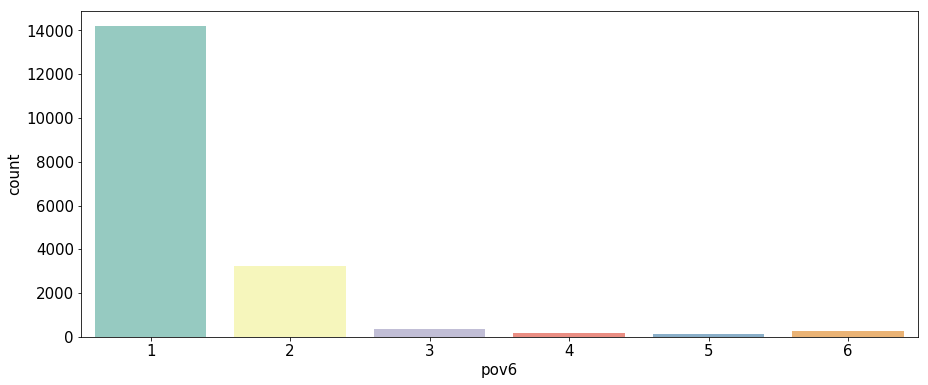

Class=1, n=14197 (77.246%)
Class=2, n=3246 (17.661%)
Class=4, n=183 (0.996%)
Class=6, n=285 (1.551%)
Class=3, n=335 (1.823%)
Class=5, n=133 (0.724%)


In [76]:
# PLOT DISTRIBUTION OF THE TARGET CLASSES
plt.figure(figsize=(15,6))
sns.countplot(label.pov6, palette='Set3')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(label.pov6)
for k,v in counter.items():
    per = v / len(label) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

data is unbalanced with most of the classes in class 1. we will use re sampling techniques to re engineer the data.

Resampling techniques include undersampling and oversampling. Undersampling means reducing the majority classes to the minority class and Oversampling means increasing the minority classes to the majority class.

We will not use Undersampling because minority class has 133 datapoints and reducing to such a less number will reduce our datapoints which is not good for the classification. Hence we will go for Oversampling.

## BALANCE THE LABEL DATA BY OVERSAMPLING & UNDERSAMPLING 

## SMOTE 

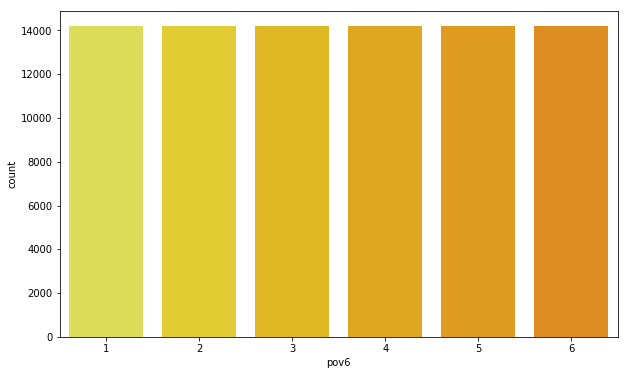

Class=1, n=14197 (16.667%)
Class=2, n=14197 (16.667%)
Class=4, n=14197 (16.667%)
Class=6, n=14197 (16.667%)
Class=3, n=14197 (16.667%)
Class=5, n=14197 (16.667%)


In [55]:
# PERFORM OVERSAMPLING USING SMOTE ( SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE )
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(scaled_train_data, label)

# PLOT THE NEW DATA
plt.figure(figsize=(10,6))
sns.countplot(y_over.pov6, palette='Wistia')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(y_over.pov6)
for k,v in counter.items():
    per = v / len(y_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

## NearMiss 1

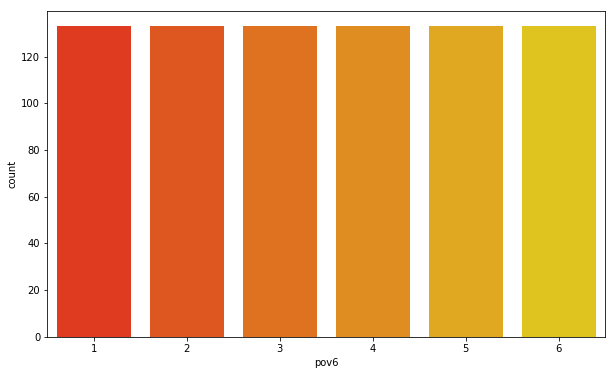

Class=1, n=133 (16.667%)
Class=2, n=133 (16.667%)
Class=3, n=133 (16.667%)
Class=4, n=133 (16.667%)
Class=5, n=133 (16.667%)
Class=6, n=133 (16.667%)


In [56]:
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_under, y_under = undersample.fit_resample(scaled_train_data, label)

# PLOT THE NEW DATA
plt.figure(figsize=(10,6))
sns.countplot(y_under.pov6, palette='autumn')
plt.show()

# SUMMARIZE DISTRIBUTION
counter = Counter(y_under.pov6)
for k,v in counter.items():
    per = v / len(y_under) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Now the data is balanced.

## CLASSIFICATION 

## TEST MULTIPLE CLASSIFICATION ALGORITHMS ON UNDERSAMPLED DATA

We will test multiple classification algorithms on undersampled data and choose the algorithm with high F beta score. F beta score is a generalized form of F1 score. F1 score has precision and recall equal weightage. In Fbeta score, you can give weightage to precision and recall using parameter beta. We will give Recall higher preference. 

Then the best algorithm will be fit on both UNDERSAMPLED and OVERSAMPLED data and we will compare which resampling technique gives the best results.

In [59]:
# CREATE PIPELINE OF ALL THE POSSIBLE CLASSIFIERS
est =[]

est.append(('GradientBoosting', Pipeline([('GradientBoosting',GradientBoostingClassifier())])))
est.append(('RandomForest', Pipeline([('RandomForest', RandomForestClassifier())]))) 
est.append(('Bagging', Pipeline([('Bagging', BaggingClassifier())])))
est.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeClassifier())])))
est.append(('XGB', Pipeline([('XGB', XGBClassifier())])))

We will use Repeated Stratified K-Fold model validation technique to train the model. It repeats Stratified K-Fold n times with different randomization in each repetition. Stratified K-Fold cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class. 

It will make sure that model is overfitted.

## Train the UNDERSAMPLED data with different classifiers

In [64]:
import warnings
warnings.filterwarnings(action='ignore')

seed = 4
splits = 5

# CALCULATE F1 SCORE WITH MORE WEIGHT ON RECALL
f_score = make_scorer(fbeta_score, beta=2, average='macro')
models_score =[]

for i in est:
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    results = cross_val_score(i[1], X_under, y_under, cv=cv, scoring=f_score)
    models_score.append({i[0] : '{}'.format(results.mean())})

[05:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [65]:
print("F1 SCORES OF DIFFERENT CLASSIFIERS")
models_score

F1 SCORES OF DIFFERENT CLASSIFIERS


[{'GradientBoosting': '0.890601608899095'},
 {'RandomForest': '0.8073373183980261'},
 {'Bagging': '0.8505083654178367'},
 {'DecisionTree': '0.7763662555155918'},
 {'XGB': '0.8906450697660531'}]

xgboost has great Fbeta scores. We will choose the one with the highest Fbeta score. 

## FIT THE BEST MODEL ON THE UNDERSAMPLED DATA

In [66]:
model = XGBClassifier()
model.fit(X_under, y_under.pov6)
# PREDICT ON THE TEST DATA
predict_under = model.predict(scaled_test_data)

[05:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## FIT THE BEST MODEL ON THE OVERSAMPLED DATA

In [68]:
model_ = XGBClassifier()
model_.fit(X_over, y_over.pov6)
# PREDICT ON THE TEST DATA
predict_over = model_.predict(scaled_test_data)

[05:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## UNDERSAMPLED vs OVERSAMPLED PREDICTED DISTRIBUTION COMPARISON

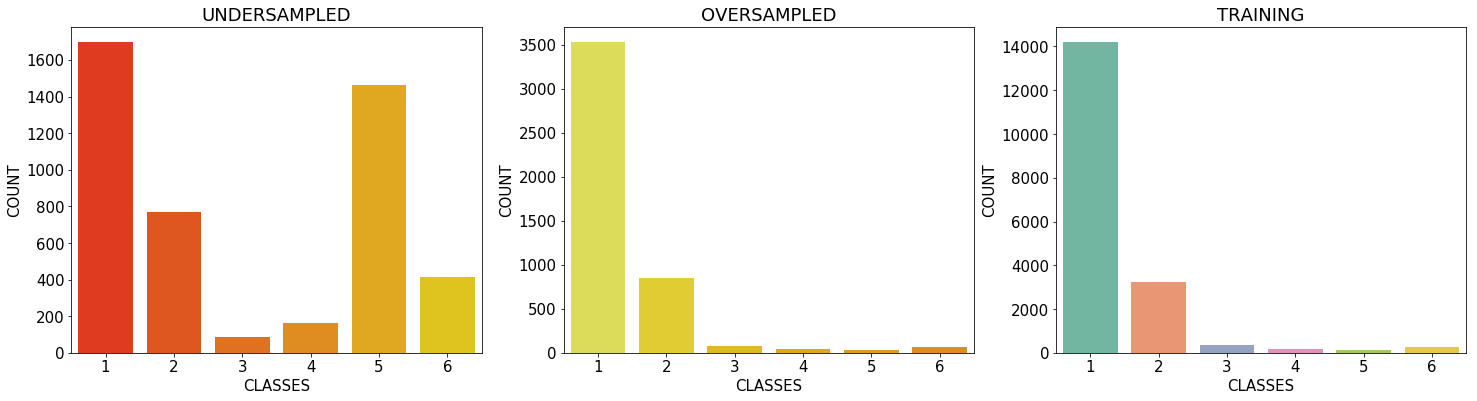

DISTRIBUTION OF PREDICTED UNDERSAMPLED CLASSES
Class=1, n=1697 (36.931%)
Class=4, n=163 (3.547%)
Class=5, n=1463 (31.839%)
Class=3, n=89 (1.937%)
Class=6, n=416 (9.053%)
Class=2, n=767 (16.692%)

DISTRIBUTION OF PREDICTED OVERSAMPLED CLASSES
Class=1, n=3527 (76.757%)
Class=4, n=46 (1.001%)
Class=2, n=845 (18.390%)
Class=6, n=65 (1.415%)
Class=5, n=33 (0.718%)
Class=3, n=79 (1.719%)


In [69]:
l = [predict_under, predict_over, train_data.pov6]
pal = ["autumn",'Wistia','Set2']
titles =['UNDERSAMPLED', 'OVERSAMPLED', 'TRAINING']

plt.figure(figsize=(25,6))
plt.rc('font', size=15)
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.countplot(l[i], palette=pal[i])
    plt.title(titles[i])
    plt.xlabel('CLASSES')
    plt.ylabel('COUNT')
plt.show()

# SUMMARIZE DISTRIBUTION
print('DISTRIBUTION OF PREDICTED UNDERSAMPLED CLASSES')
counter = Counter(predict_under)
for k,v in counter.items():
    per = v / len(predict_under) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
print()
print('DISTRIBUTION OF PREDICTED OVERSAMPLED CLASSES')
counter = Counter(predict_over)
for k,v in counter.items():
    per = v / len(predict_over) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Oversampled sample keeps the same predicted graph/pattern as the train data hence it is not reliable and we instead choose the undersampled sample created using NearMiss 1.

